# EMERITUS CAPSTONE PROJECT
**_NUVEEN SALES ANALYSIS:_**
The aim of the project is to build a machine learning model to predict _next year_ sales based on different explanatory variables which describe _current year_ sales.

In the following notebooks, each one of the steps in the Machine Learning model building pipeline are described. There will be a notebook for each one of the Machine Learning Pipeline steps:

1. Exploratory Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building

**This is the notebook for step 1: Exploratory Data Analysis**

In [2]:
##IMPORTS SECTION
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from eda_report import data_report as rp
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### _DATA ANALYSIS REPORT_

_EDA Report_ is a `Process Data Report` tool developed to simplify the `data cleaning` process. The report is composed of a set of functions that run on a pandas Dataframe. The functions retrieve a comprenhensive report and a basic set of plots that can lead the process of Exploratory Data Analysis and Feature Engineering.

The functions provided by the `Process Data Report` are listed next:
   - report: **data process report generator**
   - codes: **description of codes regarding with process suggestion**
   - corr_matrix: **correlation matrix plot as heatmap**
   - univar_plot: **histogram and QQ-plot for a single variable**
   - multivar_plot: **pairwise plot showing the relationship of the variables**
   - sta_description: **statistical description of a set of variables**
   - variable_type: **separates the variables in the dataset as Numerical / Categorical**
   
**_Reference: https://github.com/acadena-repo/EDA-n-Processing_**

In [3]:
##LOAD DATASET
df2018 = pd.read_excel('./data/Transaction Data.xlsx',sheet_name='Transactions18')
df2019 = pd.read_excel('./data/Transaction Data.xlsx',sheet_name='Transactions19')
df_dict = pd.read_excel('./data/Data Dictionary.xlsx', usecols = ['Column Name', 'Description'], skiprows = 1)

In [4]:
def var_description(variable):
    idx = df_dict.index.tolist()
    for i in idx:
        if df_dict.iloc[i]['Column Name'] == variable:
            descr = df_dict.iloc[i]['Description']
            break
            
    return descr

In [9]:
fea = ['no_of_sales_12M_1','no_of_sales_12M_10K','no_of_funds_sold_12M_1','no_of_fund_sales_12M_10K',
       'no_of_assetclass_sold_12M_1','no_of_assetclass_sales_12M_10K','No_of_fund_curr','No_of_asset_curr','AUM','sales_curr']
for f in fea:
    print(var_description(f))

#of sales in last 12 M having >=1$
#of sales in last 12 M having >=10K$
# of funds sold to FA in last 12 months having >=1$
# of funds sold to FA in last 12 months having >=10K$
# of asset class sold to FA in last 12 months having >=1$
# of asset class sold to FA in last 12 months having >=10K$
# of funds currently held on the refresh date
# of funds currently held on the refresh date
AUM till current refresh date
Total sales in current month


**Exploratory Data Analysis on `2018 Transactions`**

- Target variable: `sales_12M`

In [38]:
##DATA REPORT ON '2018 Transactions' DATASET
print('Number of Variables: {}'.format(df2018.shape[1]))
rp.report(df2018)

Number of Variables: 38


,Missing No.,Missing %,Cardinality,Variable,Max Value,Min Value,Suggesting
sales_curr,7574,75.70,2319,Numerical,9.63954e+06,-134054,IMP/TRM/BIN/
redemption_curr,7429,74.25,2447,Numerical,447746,-1.32088e+07,IMP/TRM/BIN/
new_Fund_added_12M,7310,73.06,15,Numerical,16,1,IMP/TRM/DPE/
no_of_sales_12M_10K,7293,72.89,102,Numerical,986,1,IMP/TRM/BIN/
no_of_fund_sales_12M_10K,7293,72.89,16,Numerical,19,1,IMP/TRM/DPE/
no_of_assetclass_sales_12M_10K,7293,72.89,5,Numerical,5,1,IMP/TRM/DPE/
no_of_Redemption_12M_10K,7029,70.25,83,Numerical,883,1,IMP/TRM/BIN/
no_of_funds_Redemption_12M_10K,7029,70.25,18,Numerical,21,1,IMP/TRM/DPE/
no_of_assetclass_Redemption_12M_10K,7029,70.25,4,Numerical,4,1,IMP/TRM/OHE/
no_of_funds_sold_12M_1,5242,52.39,25,Numerical,32,1,IMP/TRM/BIN/


In [30]:
#rp.codes('BIN')

From the `Process Data Report` can be noticed that preatty much all variables have **missing data**, so a **missing imputation** technique should be used. Also, _CONTACT ID_ has a unique value for each data point, so can be removed and _refresh date_ can be removed too, due to it's a constant variable (low cardinality).

In [4]:
##CONTACT_ID & REFRESH_DATA ARE REMOVED FROM DATASET
col_rem = ['CONTACT_ID','refresh_date']
df = df2018.drop(columns=col_rem, axis=1)
print('Number of Variables: {}'.format(df.shape[1]))

Number of Variables: 36


We will start analysing **Discrete** variables. The variables can be extracted assuming a cardinality value less than: **20**

In [5]:
var_disc = [var for var in df.columns if len(df[var].unique()) < 20]
print('Number of Discrete Variables: {}'.format(len(var_disc)))
df[var_disc].head()

Number of Discrete Variables: 11


,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_asset_curr,new_Fund_added_12M,aum_AC_MONEY,aum_P_ALT,aum_P_ETF
0,NaN,1.0,2.0,2.0,NaN,1.0,1.0,NaN,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


It seems that variables which start with: `"no_of"` are discrete. A further analysis on these variables will be performed under the assumption that:
- varibale is discrete
- variable has a relationship with the target

A function is used to analyze each of the variables.

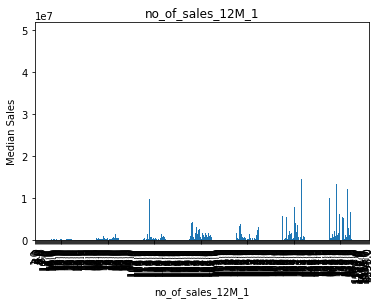

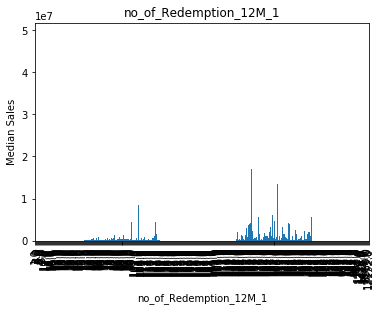

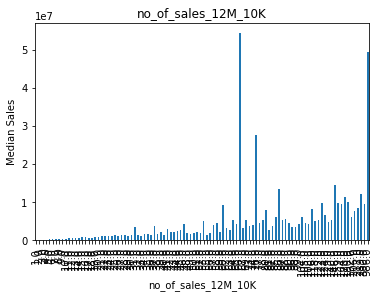

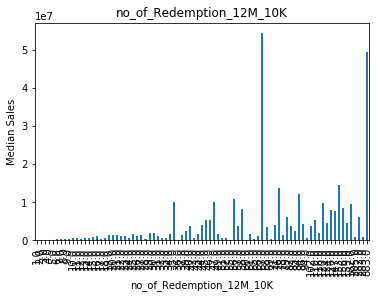

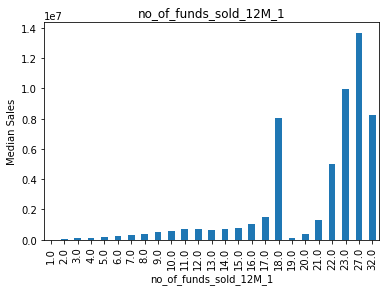

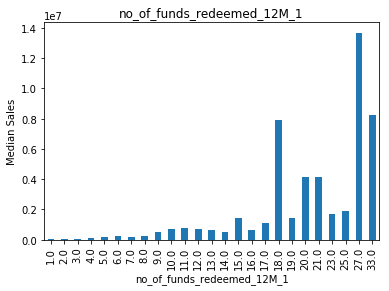

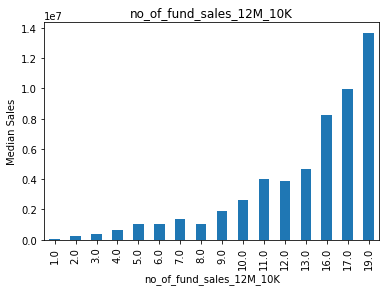

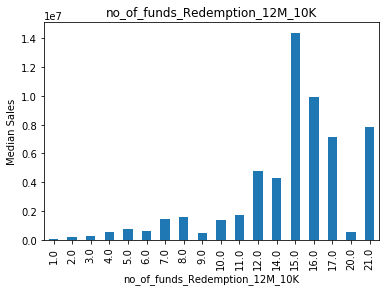

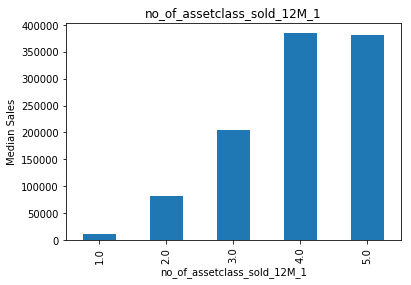

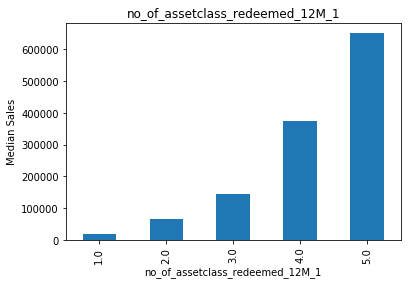

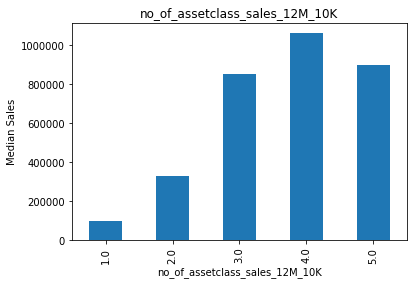

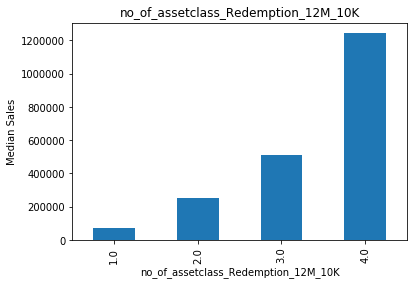

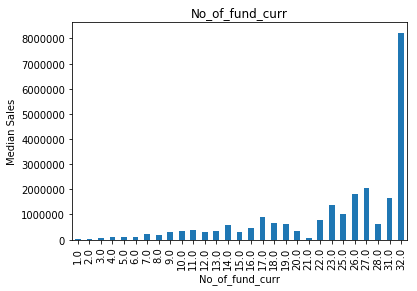

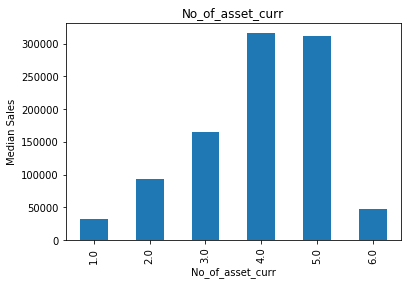

In [6]:
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['sales_12M'].median().plot.bar()
    plt.title(var)
    plt.ylabel('Median Sales')
    plt.show()

##GETTING ALL VARIABLES THAT START WITH: NO_OF....
col_nof = [col for col in df.columns if col.lower().startswith('no_of_')]
for var in col_nof:
    analyse_discrete(df,var)

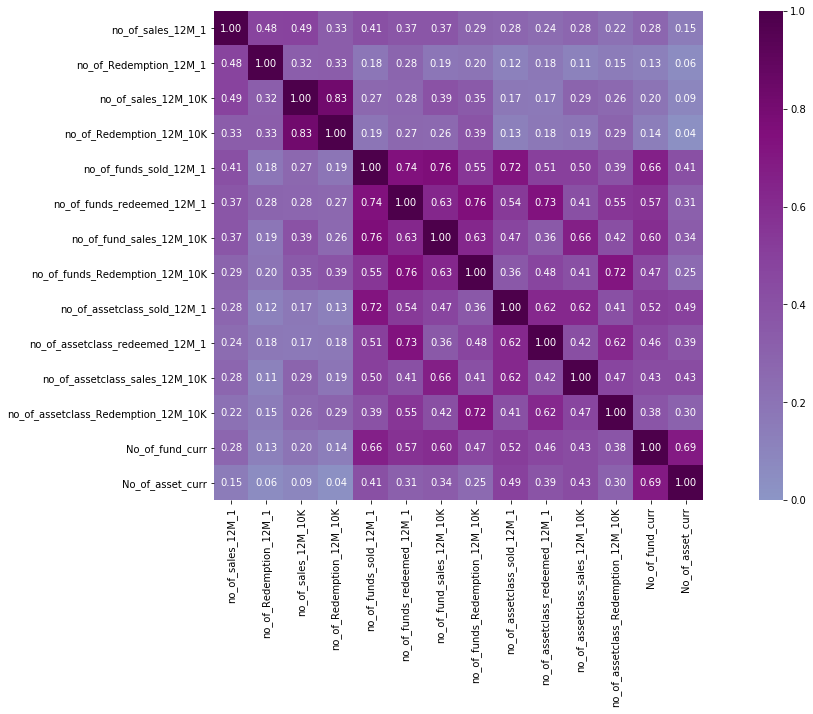

In [66]:
df_dis = df[col_nof]
rp.corr_matrix(df_dis)

The variables:
- `no_of_sales_12M_1`
- `no_of_Redemption_12M_1`
- `no_of_sales_12M_10K`
- `no_of_Redemption_12M_10K`

suggest that those are continuos variables, so a Histogram will be used instead of the bar plot in order to analyze its distribution.

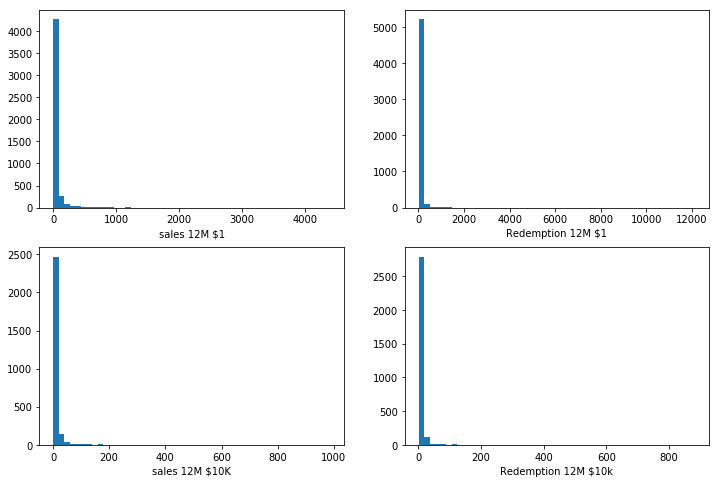

In [7]:
fig, ax = plt.subplots(2,2,figsize=(12,8))
ax[0,0].hist(df['no_of_sales_12M_1'], bins=50)
ax[0,0].set_xlabel('sales 12M $1')
ax[0,1].hist(df['no_of_Redemption_12M_1'], bins=50)
ax[0,1].set_xlabel('Redemption 12M $1')
ax[1,0].hist(df['no_of_sales_12M_10K'], bins=50)
ax[1,0].set_xlabel('sales 12M $10K')
ax[1,1].hist(df['no_of_Redemption_12M_10K'], bins=50)
ax[1,1].set_xlabel('Redemption 12M $10k')
plt.show();

The distribution of `sales` and `redemption` are skewed, also it seems the `sales` and `redemption` variables show similar data and probably are correlated too. A logaritmic transformation is applyed to try to correct the distribution.

                          no_of_sales_12M_1  no_of_Redemption_12M_1  \
no_of_sales_12M_1                  1.000000                0.699340   
no_of_Redemption_12M_1             0.699340                1.000000   
no_of_sales_12M_10K                0.649261                0.481142   
no_of_Redemption_12M_10K           0.481012                0.637659   

                          no_of_sales_12M_10K  no_of_Redemption_12M_10K  
no_of_sales_12M_1                    0.649261                  0.481012  
no_of_Redemption_12M_1               0.481142                  0.637659  
no_of_sales_12M_10K                  1.000000                  0.623367  
no_of_Redemption_12M_10K             0.623367                  1.000000  


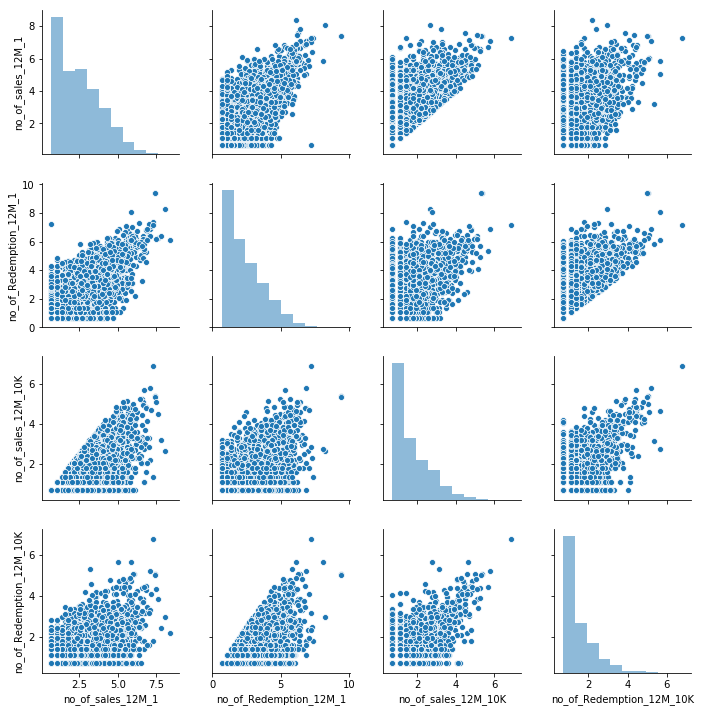

In [8]:
var_sr = ['no_of_sales_12M_1','no_of_Redemption_12M_1','no_of_sales_12M_10K','no_of_Redemption_12M_10K']
df_sr = df[var_sr].apply(np.log1p)
rp.multivar_plot(df_sr)
print(df_sr.corr())

The variables are **highly correlated** and also the distribution still skewed after the logaritmic transformation. This suggest that the variables have **high cardinality**. An **Encoding** technique should help to decrese the cardinality, also a technique that produce a **monotonic** relationship with the `target` can help to get a better distribution.

Only the variables:
- `no_of_sales_12M_1`
- `no_of_sales_12M_10K`
- `no_of_funds_sold_12M_1`
- `no_of_fund_sales_12M_10K`
- `no_of_assetclass_sold_12M_1`
- `no_of_assetclass_sales_12M_10K`
- `No_of_fund_curr`
- `No_of_asset_curr`

will be used in the model's dataset due to `Redemption` ones present `colinearity` with the `Sales` variables.

The rest of the variables that are not analyzed yet are assumed to be continuous. All these variables are checked againts the target to see if those are correlated.

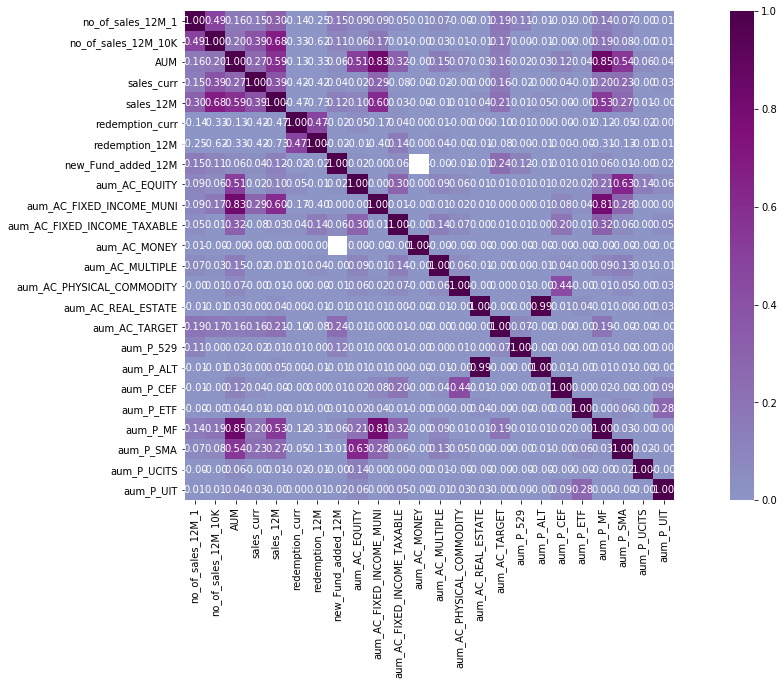

In [9]:
no_num = ['no_of_Redemption_12M_1','no_of_Redemption_12M_10K','no_of_funds_sold_12M_1','no_of_funds_redeemed_12M_1',
 'no_of_fund_sales_12M_10K','no_of_funds_Redemption_12M_10K','no_of_assetclass_sold_12M_1','no_of_assetclass_redeemed_12M_1',
 'no_of_assetclass_sales_12M_10K','no_of_assetclass_Redemption_12M_10K','No_of_fund_curr','No_of_asset_curr']
df_num = df.drop(columns=no_num, axis=1)
rp.corr_matrix(df_num)

Examining the heatmap we can notice several areas that show **high correlation**. In order to get a better undestanding of these variables we're going to take a look on the 15 most correlated variables with the target variable `sales_12M`

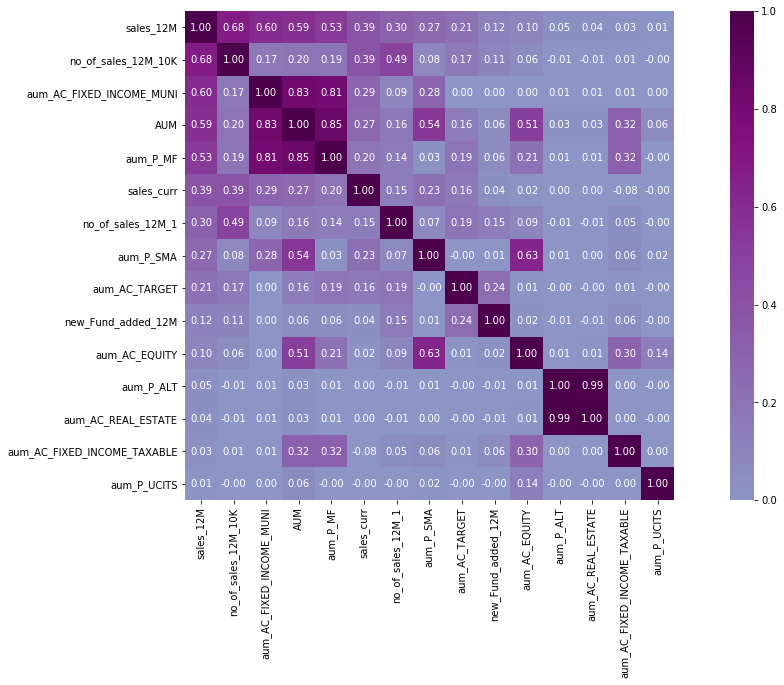

In [10]:
var_corr = df_num.corr()
col = var_corr.nlargest(15, 'sales_12M').index
df_15_corr = df_num[col]
rp.corr_matrix(df_15_corr)

In [58]:
no_related = [col for col in df_num.columns if col not in df_15_corr.columns]
no_related

['redemption_curr',
 'redemption_12M',
 'aum_AC_MONEY',
 'aum_AC_MULTIPLE',
 'aum_AC_PHYSICAL_COMMODITY',
 'aum_P_529',
 'aum_P_CEF',
 'aum_P_ETF',
 'aum_P_UIT']

It can be noticed that `AUM` is correlated with the target and also with other several variables that start with `aum_`.
Further analysis for these variables will conducted in order to reduce the set of variables to be used.

In [11]:
df_aum = df_num[[col for col in df_num.columns if col.lower().startswith('aum')]]
print('Number of Variables: {}'.format(df_aum.shape[1]))
rp.report(df_aum)

Number of Variables: 17


,Missing No.,Missing %,Cardinality,Variable,Max Value,Min Value,Suggesting
AUM,585,5.85,9350,Numerical,2.232411e+08,-7.713610e+07,IMP/TRM/BIN/
aum_P_529,585,5.85,274,Numerical,1.763516e+06,-3.504350e+03,IMP/TRM/BIN/
aum_P_UCITS,585,5.85,50,Numerical,1.450662e+07,-1.169214e+06,IMP/TRM/BIN/
aum_P_SMA,585,5.85,2595,Numerical,7.673828e+07,-2.362418e+07,IMP/TRM/BIN/
aum_P_MF,585,5.85,8925,Numerical,2.203957e+08,-7.713610e+07,IMP/TRM/BIN/
aum_P_ETF,585,5.85,17,Numerical,7.751123e+04,-2.245798e+04,IMP/TRM/DPE/
aum_P_CEF,585,5.85,515,Numerical,1.442956e+07,0.000000e+00,IMP/TRM/BIN/
aum_P_ALT,585,5.85,12,Numerical,3.800000e+06,0.000000e+00,IMP/TRM/DPE/
aum_AC_TARGET,585,5.85,375,Numerical,3.077415e+07,-2.179176e+04,IMP/TRM/BIN/
aum_AC_EQUITY,585,5.85,7404,Numerical,7.196701e+07,-5.650882e+07,IMP/TRM/BIN/


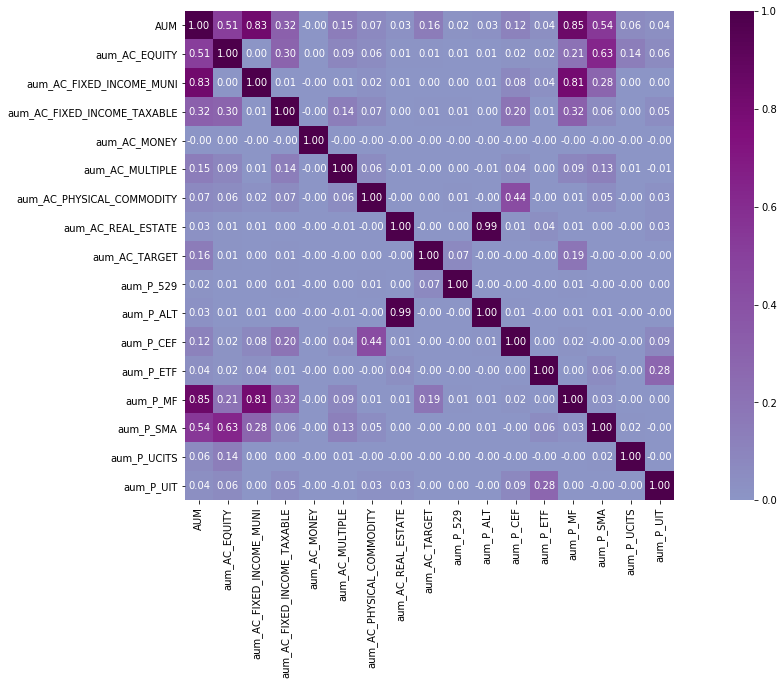

In [12]:
rp.corr_matrix(df_aum)

After a visual analysis the most relevant variables related with `AUM` were selected and will be used to **impute** the value for `AUM`, in order to use `AUM` in the predictors set for the target.

In [17]:
aum_rem = ['aum_P_529','aum_P_ALT','aum_AC_REAL_ESTATE','aum_AC_PHYSICAL_COMMODITY','aum_P_ETF','aum_P_UCITS','aum_P_UIT',
'aum_AC_EQUITY','aum_AC_MONEY']
df_aum_red = df_aum.drop(columns=aum_rem, axis=1)
rp.report(df_aum_red)

,Missing No.,Missing %,Cardinality,Variable,Max Value,Min Value,Suggesting
AUM,585,5.85,9350,Numerical,2.232411e+08,-7.713610e+07,IMP/TRM/BIN/
aum_AC_FIXED_INCOME_MUNI,585,5.85,6666,Numerical,2.209272e+08,-2.123285e+07,IMP/TRM/BIN/
aum_AC_FIXED_INCOME_TAXABLE,585,5.85,3977,Numerical,1.669342e+07,-2.909837e+07,IMP/TRM/BIN/
aum_AC_MULTIPLE,585,5.85,2134,Numerical,1.104014e+07,-4.500193e+06,IMP/TRM/BIN/
aum_AC_TARGET,585,5.85,375,Numerical,3.077415e+07,-2.179176e+04,IMP/TRM/BIN/
aum_P_CEF,585,5.85,515,Numerical,1.442956e+07,0.000000e+00,IMP/TRM/BIN/
aum_P_MF,585,5.85,8925,Numerical,2.203957e+08,-7.713610e+07,IMP/TRM/BIN/
aum_P_SMA,585,5.85,2595,Numerical,7.673828e+07,-2.362418e+07,IMP/TRM/BIN/


The Dataframe with the 15 most correlated variables with `sales_12M` is adjusted with the relevant predictors then the distributions are analyzed (continuous variables).

In [35]:
col_rem = df_aum.columns.to_list()
col_rem.remove('AUM')
col_rem = col_rem + col_nof + ['new_Fund_added_12M','redemption_curr','redemption_12M']
df_con = df.drop(columns=col_rem, axis=1)

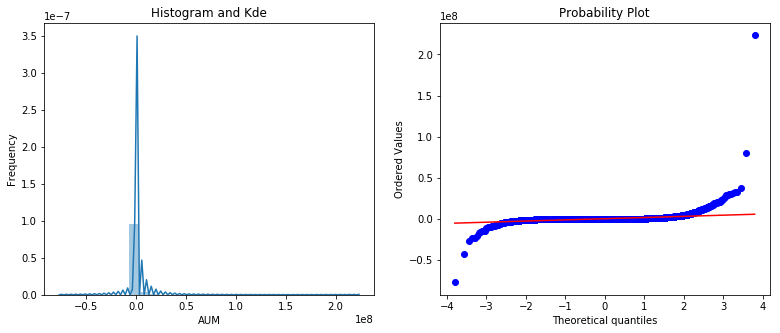

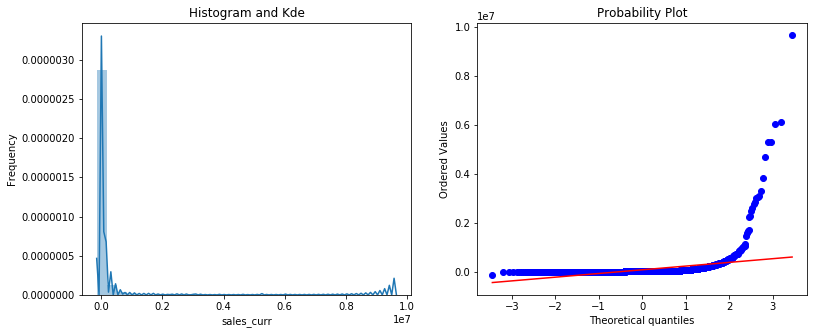

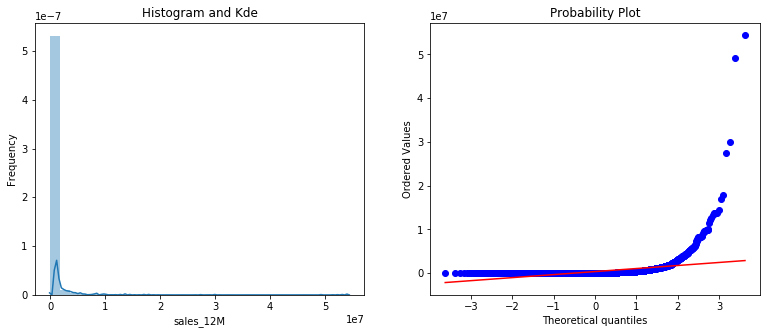

In [36]:
unv = [df_con[i].dropna() for i in df_con.columns]
for x in unv:
    rp.univar_plot(x)

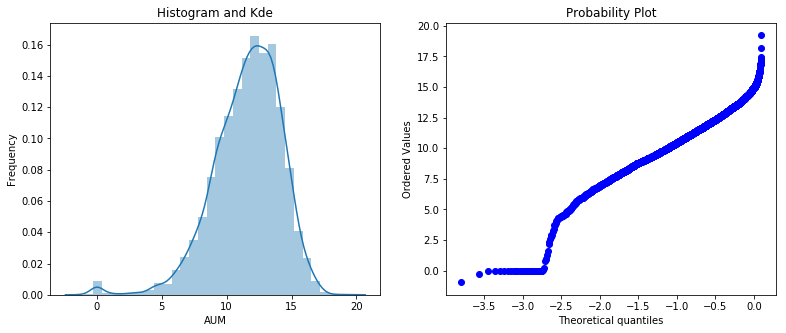

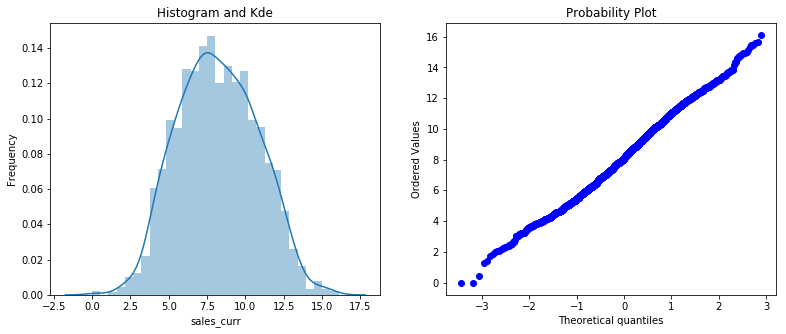

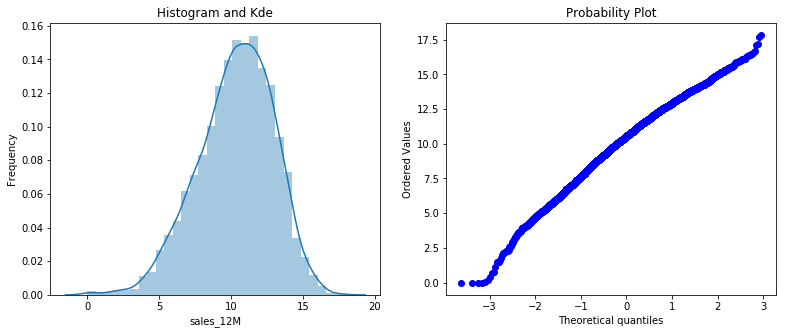

In [37]:
for x in unv:
    tran = np.log1p(x)
    rp.univar_plot(tran)

It can be noticed that all the continuous varibles improved its distribution after a **logaritmic transformation**. The transformation will be used on all these variables as a _Feature Engineering_ technique

# Conclusions:

### Variables to be discard:
- CONTACT_ID: This is not a predictor
- refresh_date: Variable is constant
- no_of_Redemption_12M_1: Collinearity with other variables
- no_of_Redemption_12M_10K: Collinearity with other variables
- no_of_funds_redeemed_12M_1: Collinearity with other variables
- no_of_funds_Redemption_12M_10K: Collinearity with other variables
- no_of_assetclass_redeemed_12M_1: Collinearity with other variables
- no_of_assetclass_Redemption_12M_10K: Collinearity with other variables
- redemption_curr: Variable is not related with Target
- redemption_12M: Variable is not related with Target
- aum_AC_MONEY: Variable is not related with Target and/or AUM
- aum_AC_EQUITY:  Collinearity with other variables
- aum_AC_PHYSICAL_COMMODITY:  Variable is not related with Target and/or AUM
- aum_AC_REAL_ESTATE:  Variable is not related with Target and present collinearity with other variables
- aum_P_529: Variable is not related with Target and/or AUM
- aum_P_ALT: Variable is not related with Target and/or AUM
- aum_P_UCITS: Variable is not related with Target and/or AUM
- aum_P_ETF: Variable is not related with Target and/or AUM
- aum_P_UIT: Variable is not related with Target and/or AUM
***
### Variables preprocessing:

`Preprocessing` refers to the application of **Feature Engineering** techniques in order to treat the variables to be consumed by the Machine Learning model. Next a brief description of the planned techniques to be used.

**AUM Imputation:**
- Using the variables: 'aum_AC_FIXED_INCOME_MUNI', 'aum_AC_FIXED_INCOME_TAXABLE', 'aum_AC_MULTIPLE', 'aum_AC_TARGET', 'aum_P_CEF', 'aum_P_MF' and 'aum_P_SMA', the _Assets-Under-Management_ will be estimated. A KNN model will be used to **impute** the variable.

**Discrete Variables:**
- The variables: 'no_of_sales_12M_1', 'no_of_sales_12M_10K', 'no_of_funds_sold_12M_1', 'no_of_fund_sales_12M_10K', 'no_of_assetclass_sold_12M_1', 'no_of_assetclass_sales_12M_10K', 'No_of_fund_curr', 'No_of_asset_curr', will be treated as `Discrete Variables`. An Encoding tehcnique will be applied to these set of variables.

**Countinuos Variables:**
- The variables: 'AUM', 'sales_curr', 'sales_12M', will be treated as `Continuous Variables`. A Logarithmic Transformation will be applied to these variables in order to "Normalize" its distribution. Furthermore, a technique such as `Binarization` should be used to handle **outliers** in the distribution of the variable.
